In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn 

In [123]:
import pandas as pd
import os

In [124]:
os.getcwd()

'/Users/sergiomiguelmoya/Desktop/Expression_data'

In [125]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

In [4]:
os.chdir("Desktop/Expression_data")
os.getcwd()

'/Users/sergiomiguelmoya/Desktop/Expression_data'

In [126]:
data=pd.read_csv("TPM_expression_counts_from_25_maize_lines_from_NAM_population.txt", delimiter='\t')

In [127]:
data.head()

,Run,growth_condition,Cultivar,Developmental_stage,organism_part,Age,Zm00001d027230,Zm00001d027231,Zm00001d027232,Zm00001d027233,...,ENSRNA049478534,ENSRNA049478548,ENSRNA049478530,ENSRNA049478543,ENSRNA049478539,Zm00001d000458,Zm00001d000460,ENSRNA049478900,ENSRNA049478881,ENSRNA049478891
0,ERR3791403,field study,B97,FL.00 first flower(s) open stage,anther,77,8.510949,10.058043,0.000000,0.000000,...,16.537172,0.000000,11.872853,0.000000,8.448431,1.709411,0.242246,0.000000,9.235837,0.0
1,ERR3791404,field study,B97,FL.00 first flower(s) open stage,anther,77,10.910000,8.692256,0.000000,0.000000,...,10.743384,0.000000,8.903063,0.000000,6.732991,2.551930,0.281277,0.250853,3.929845,0.0
2,ERR3791405,field study,CML103,FL.00 first flower(s) open stage,anther,86,6.985268,34.136787,0.103331,0.117841,...,37.059623,0.505987,97.406708,0.000000,8.060919,0.271377,0.074779,0.000000,2.879880,0.0
3,ERR3791406,field study,CML103,FL.00 first flower(s) open stage,anther,86,5.884681,30.208199,0.000000,0.025468,...,29.745078,0.000000,27.391827,0.353128,18.185037,0.254155,0.126060,0.000000,12.775794,0.0
4,ERR3791407,green house study,CML277,FL.00 first flower(s) open stage,anther,105,7.128136,35.295292,0.000000,0.031765,...,9.570144,0.000000,50.979666,0.000000,1.578511,1.743424,0.000000,0.000000,0.569079,0.0


In [128]:
data.shape

(480, 46436)

In [129]:
data.dropna(inplace=True)

In [130]:
data.shape

(480, 46436)

In [10]:
summary=data.describe()

In [11]:
summary

,Age,Zm00001d027230,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027234,Zm00001d027235,Zm00001d027236,Zm00001d027239,Zm00001d027240,...,ENSRNA049478534,ENSRNA049478548,ENSRNA049478530,ENSRNA049478543,ENSRNA049478539,Zm00001d000458,Zm00001d000460,ENSRNA049478900,ENSRNA049478881,ENSRNA049478891
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,64.897917,12.596906,67.749883,1.388376,1.508367,0.751912,0.113894,3.527227,30.247531,9.905033,...,29.922860,0.817505,60.367021,0.371803,27.599873,1.777610,0.355444,0.036079,4.634066,1.326740
std,32.987566,8.251002,72.487511,4.423135,4.877728,2.583863,0.402392,5.301170,25.707406,20.541681,...,46.317279,4.364968,134.874943,2.037344,95.524983,2.648469,0.621765,0.131807,6.806106,19.280274
min,8.000000,0.670668,0.313049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.315154,0.000000,0.785604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,6.350173,17.262911,0.000000,0.000000,0.000000,0.000000,1.132790,12.758163,0.245663,...,7.940671,0.000000,7.341224,0.000000,3.941111,0.135455,0.020566,0.000000,1.137828,0.000000
50%,75.000000,11.111480,42.406016,0.000000,0.058258,0.000000,0.000000,2.271066,26.474499,0.399227,...,17.401347,0.000000,15.465150,0.000000,7.393419,0.897322,0.120293,0.000000,2.309786,0.000000
75%,84.000000,16.174705,89.025849,0.181351,0.273430,0.137856,0.000000,4.103381,41.687827,14.582597,...,32.980257,0.668542,41.911730,0.274631,15.998706,2.380819,0.386943,0.000000,4.854717,0.340613
max,126.000000,64.120084,359.942534,29.016122,32.657122,20.668942,4.434917,61.238524,238.484437,190.124024,...,589.372120,78.104148,1625.605713,40.843937,1777.926508,21.283590,5.023754,1.270945,72.154755,420.692553


In [131]:
data = data.set_index('Run')
data = data.drop(columns=['growth_condition', 'Cultivar', 'Developmental_stage', 'organism_part', 'Age'])

In [132]:
data.head()

,Zm00001d027230,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027234,Zm00001d027235,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,...,ENSRNA049478534,ENSRNA049478548,ENSRNA049478530,ENSRNA049478543,ENSRNA049478539,Zm00001d000458,Zm00001d000460,ENSRNA049478900,ENSRNA049478881,ENSRNA049478891
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791403,8.510949,10.058043,0.000000,0.000000,0.146622,0.0,0.292435,18.542450,16.514658,21.261669,...,16.537172,0.000000,11.872853,0.000000,8.448431,1.709411,0.242246,0.000000,9.235837,0.0
ERR3791404,10.910000,8.692256,0.000000,0.000000,0.000000,0.0,0.611194,24.256623,18.382964,22.765770,...,10.743384,0.000000,8.903063,0.000000,6.732991,2.551930,0.281277,0.250853,3.929845,0.0
ERR3791405,6.985268,34.136787,0.103331,0.117841,0.000000,0.0,1.083260,26.484477,0.265134,21.201103,...,37.059623,0.505987,97.406708,0.000000,8.060919,0.271377,0.074779,0.000000,2.879880,0.0
ERR3791406,5.884681,30.208199,0.000000,0.025468,0.000000,0.0,1.521768,17.038040,0.254364,14.792027,...,29.745078,0.000000,27.391827,0.353128,18.185037,0.254155,0.126060,0.000000,12.775794,0.0
ERR3791407,7.128136,35.295292,0.000000,0.031765,0.000000,0.0,0.759191,28.343867,0.328578,31.576936,...,9.570144,0.000000,50.979666,0.000000,1.578511,1.743424,0.000000,0.000000,0.569079,0.0


In [133]:
max_gene_level = data.max(axis=0)
print('Max gene expression level of all genes:', max_gene_level.max())
print('Max gene expression levels by quantile:', max_gene_level.quantile([.1, .15, .2, .25, .3, .5, .75, .8, .9, 1]))

Max gene expression level of all genes: 226800.618723612
Max gene expression levels by quantile: 0.10         0.384741
0.15         0.969848
0.20         1.960110
0.25         3.716789
0.30         6.712447
0.50        30.409438
0.75        95.569658
0.80       126.446603
0.90       269.996803
1.00    226800.618724
dtype: float64


In [134]:
print('Number of genes whose max expression level is 0:', max_gene_level.isin([0]).sum())
print('Number of genes whose max expression level is less than 1 TPM:', max_gene_level[max_gene_level < 1.].count())
print('Number of genes whose max expression level is less than 5 TPM:', max_gene_level[max_gene_level < 5.].count())
print('Number of genes whose max expression level is less than 10 TPM:', max_gene_level[max_gene_level < 10.].count())

Number of genes whose max expression level is 0: 2432
Number of genes whose max expression level is less than 1 TPM: 7042
Number of genes whose max expression level is less than 5 TPM: 12722
Number of genes whose max expression level is less than 10 TPM: 15745


In [135]:
average_gene_level = data.mean(axis=0)

In [136]:
average_gene_level=pd.DataFrame(average_gene_level,columns=['Average'])
average_gene_level.head()

,Average
Zm00001d027230,12.596906
Zm00001d027231,67.749883
Zm00001d027232,1.388376
Zm00001d027233,1.508367
Zm00001d027234,0.751912


In [137]:
index_nonzerovalues=average_gene_level[average_gene_level['Average']>0].index
index_nonzerovalues=np.array(index_nonzerovalues)

In [138]:
index_nonzerovalues.shape

(43998,)

In [139]:
data_sub=data[index_nonzerovalues]
data_sub.head()

,Zm00001d027230,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027234,Zm00001d027235,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,...,ENSRNA049478534,ENSRNA049478548,ENSRNA049478530,ENSRNA049478543,ENSRNA049478539,Zm00001d000458,Zm00001d000460,ENSRNA049478900,ENSRNA049478881,ENSRNA049478891
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791403,8.510949,10.058043,0.000000,0.000000,0.146622,0.0,0.292435,18.542450,16.514658,21.261669,...,16.537172,0.000000,11.872853,0.000000,8.448431,1.709411,0.242246,0.000000,9.235837,0.0
ERR3791404,10.910000,8.692256,0.000000,0.000000,0.000000,0.0,0.611194,24.256623,18.382964,22.765770,...,10.743384,0.000000,8.903063,0.000000,6.732991,2.551930,0.281277,0.250853,3.929845,0.0
ERR3791405,6.985268,34.136787,0.103331,0.117841,0.000000,0.0,1.083260,26.484477,0.265134,21.201103,...,37.059623,0.505987,97.406708,0.000000,8.060919,0.271377,0.074779,0.000000,2.879880,0.0
ERR3791406,5.884681,30.208199,0.000000,0.025468,0.000000,0.0,1.521768,17.038040,0.254364,14.792027,...,29.745078,0.000000,27.391827,0.353128,18.185037,0.254155,0.126060,0.000000,12.775794,0.0
ERR3791407,7.128136,35.295292,0.000000,0.031765,0.000000,0.0,0.759191,28.343867,0.328578,31.576936,...,9.570144,0.000000,50.979666,0.000000,1.578511,1.743424,0.000000,0.000000,0.569079,0.0


In [140]:
average_gene_level = data_sub.mean(axis=0)
average_gene_level=pd.DataFrame(average_gene_level,columns=['Average'])
average_gene_level.head()

,Average
Zm00001d027230,12.596906
Zm00001d027231,67.749883
Zm00001d027232,1.388376
Zm00001d027233,1.508367
Zm00001d027234,0.751912


In [141]:
top=average_gene_level.nlargest(1000,['Average'])
top.head()

,Average
Zm00001d020592,7692.225087
Zm00001d031168,5204.713510
Zm00001d021435,5041.324319
Zm00001d035760,2664.367603
Zm00001d004843,2640.781789


In [142]:
bottom=average_gene_level.nsmallest(42998,['Average'])
bottom.head()

,Average
Zm00001d016710,0.000016
Zm00001d012949,0.000025
Zm00001d044705,0.000028
Zm00001d026820,0.000031
Zm00001d041235,0.000031


In [33]:
#####Database#####

In [143]:
X=data_sub[top.index]
X.head()

,Zm00001d020592,Zm00001d031168,Zm00001d021435,Zm00001d035760,Zm00001d004843,Zm00001d009589,Zm00001d039040,Zm00001d044685,Zm00001d005793,ENSRNA049478576,...,Zm00001d006049,Zm00001d032420,Zm00001d013758,Zm00001d029913,Zm00001d036401,Zm00001d002358,Zm00001d032359,Zm00001d025241,Zm00001d008228,Zm00001d044054
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791403,0.472596,3808.363933,5578.071959,0.000000,791.904953,2621.064635,3892.296902,3043.391635,0.000000,1912.490567,...,144.509940,87.409628,58.051231,53.576197,91.400953,45.064571,99.877493,19.960302,64.748562,101.463295
ERR3791404,0.219496,3628.935768,6266.250187,0.137338,690.106759,3066.433350,4387.722097,3109.422245,0.000000,818.263008,...,153.096435,82.940991,59.035517,56.244602,85.069997,57.230119,95.098450,19.408098,72.939052,113.797088
ERR3791405,0.000000,1673.553536,1893.139056,0.000000,148.327904,716.761146,928.626974,537.176818,0.355199,1220.419344,...,119.197036,45.150901,43.275597,127.582132,86.098985,33.151519,102.113304,14.979195,62.767062,114.307861
ERR3791406,0.000000,1850.254921,1541.424790,0.000000,135.152809,627.023013,875.505820,382.140869,0.099797,4872.079431,...,96.973888,36.098042,36.377779,128.746622,58.055376,26.779309,84.809989,16.768514,51.796585,74.089377
ERR3791407,3.885204,1188.963961,445.540733,1.663292,1022.797031,107.881687,253.523529,187.097531,0.995750,132.633283,...,106.910107,28.858978,38.182470,6.164458,152.907984,64.966611,245.328342,51.222521,24.522700,74.150208


In [144]:
Y=data_sub[bottom.index]
Y.head()

,Zm00001d016710,Zm00001d012949,Zm00001d044705,Zm00001d026820,Zm00001d041235,Zm00001d035706,Zm00001d045997,Zm00001d013490,Zm00001d039503,Zm00001d024629,...,Zm00001d045053,Zm00001d005394,Zm00001d031253,Zm00001d018177,Zm00001d043413,Zm00001d023734,Zm00001d017847,Zm00001d018134,Zm00001d014349,Zm00001d031833
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101.744570,40.677188,64.263603,71.540841,0.470495,73.002839,126.571181,132.924464,229.665414,465.854915
ERR3791404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.149158,39.604010,75.619274,70.343645,0.655562,81.313655,133.431619,132.371998,234.273293,372.437651
ERR3791405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.032873,32.581610,49.246394,71.085394,10.979920,54.408412,108.695115,112.869403,102.244411,438.149487
ERR3791406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.740392,30.397399,36.479043,75.447597,30.604448,42.690362,98.195709,108.655391,86.600214,478.047095
ERR3791407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.697246,18.520324,73.621713,66.515796,0.000000,110.082152,57.099997,55.129211,72.297381,61.703024


In [145]:
bottom=bottom.nlargest(1000,['Average'])
bottom.head()

,Average
Zm00001d031833,161.104133
Zm00001d014349,161.087794
Zm00001d018134,160.995982
Zm00001d017847,160.496605
Zm00001d023734,160.480774


In [146]:
Y=data_sub[bottom.index]
Y.head()

,Zm00001d031833,Zm00001d014349,Zm00001d018134,Zm00001d017847,Zm00001d023734,Zm00001d043413,Zm00001d018177,Zm00001d031253,Zm00001d005394,Zm00001d045053,...,Zm00001d040567,Zm00001d043113,Zm00001d029595,Zm00001d011696,Zm00001d049552,Zm00001d029965,Zm00001d039014,Zm00001d004855,Zm00001d037556,Zm00001d052034
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791403,465.854915,229.665414,132.924464,126.571181,73.002839,0.470495,71.540841,64.263603,40.677188,101.744570,...,242.686117,92.584470,78.506642,95.385248,26.117391,127.558408,63.356445,338.761841,21.806763,116.175297
ERR3791404,372.437651,234.273293,132.371998,133.431619,81.313655,0.655562,70.343645,75.619274,39.604010,96.149158,...,250.138339,92.332352,77.362749,97.465958,29.588719,139.871158,61.937880,301.736539,21.543828,145.896685
ERR3791405,438.149487,102.244411,112.869403,108.695115,54.408412,10.979920,71.085394,49.246394,32.581610,63.032873,...,116.641352,77.291361,111.293830,54.981083,25.293485,56.522460,40.954014,692.106262,40.272693,104.880964
ERR3791406,478.047095,86.600214,108.655391,98.195709,42.690362,30.604448,75.447597,36.479043,30.397399,57.740392,...,93.917492,71.178372,109.227777,43.612531,18.639600,49.106775,38.871624,654.480071,48.930762,73.287210
ERR3791407,61.703024,72.297381,55.129211,57.099997,110.082152,0.000000,66.515796,73.621713,18.520324,39.697246,...,80.450106,34.774665,75.436657,57.570922,46.070202,63.409161,86.478329,446.559268,17.807371,251.245240


In [147]:
X.head()

,Zm00001d020592,Zm00001d031168,Zm00001d021435,Zm00001d035760,Zm00001d004843,Zm00001d009589,Zm00001d039040,Zm00001d044685,Zm00001d005793,ENSRNA049478576,...,Zm00001d006049,Zm00001d032420,Zm00001d013758,Zm00001d029913,Zm00001d036401,Zm00001d002358,Zm00001d032359,Zm00001d025241,Zm00001d008228,Zm00001d044054
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791403,0.472596,3808.363933,5578.071959,0.000000,791.904953,2621.064635,3892.296902,3043.391635,0.000000,1912.490567,...,144.509940,87.409628,58.051231,53.576197,91.400953,45.064571,99.877493,19.960302,64.748562,101.463295
ERR3791404,0.219496,3628.935768,6266.250187,0.137338,690.106759,3066.433350,4387.722097,3109.422245,0.000000,818.263008,...,153.096435,82.940991,59.035517,56.244602,85.069997,57.230119,95.098450,19.408098,72.939052,113.797088
ERR3791405,0.000000,1673.553536,1893.139056,0.000000,148.327904,716.761146,928.626974,537.176818,0.355199,1220.419344,...,119.197036,45.150901,43.275597,127.582132,86.098985,33.151519,102.113304,14.979195,62.767062,114.307861
ERR3791406,0.000000,1850.254921,1541.424790,0.000000,135.152809,627.023013,875.505820,382.140869,0.099797,4872.079431,...,96.973888,36.098042,36.377779,128.746622,58.055376,26.779309,84.809989,16.768514,51.796585,74.089377
ERR3791407,3.885204,1188.963961,445.540733,1.663292,1022.797031,107.881687,253.523529,187.097531,0.995750,132.633283,...,106.910107,28.858978,38.182470,6.164458,152.907984,64.966611,245.328342,51.222521,24.522700,74.150208


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)

In [149]:
X_train.head()

,Zm00001d020592,Zm00001d031168,Zm00001d021435,Zm00001d035760,Zm00001d004843,Zm00001d009589,Zm00001d039040,Zm00001d044685,Zm00001d005793,ENSRNA049478576,...,Zm00001d006049,Zm00001d032420,Zm00001d013758,Zm00001d029913,Zm00001d036401,Zm00001d002358,Zm00001d032359,Zm00001d025241,Zm00001d008228,Zm00001d044054
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,0.472082,1458.677227,1891.649593,0.000000,551.472210,1111.429639,1866.482693,564.711310,0.000000,4085.349509,...,103.581259,48.090768,27.645825,218.516303,85.666786,62.601593,91.726289,83.785170,51.252051,86.666009
ERR3791746,0.000000,2138.179169,0.482379,0.000000,1388.959705,0.000000,0.083007,0.418137,0.000000,1091.677219,...,320.942865,6.867915,404.487615,21.557488,330.250911,42.670495,145.683809,99.212606,8.441641,126.471974
ERR3791621,0.267557,7211.098911,2518.023341,1.841509,12750.487571,487.460493,878.194688,1804.546207,0.000000,1293.112651,...,188.361897,134.394990,91.978801,1126.479771,150.754793,180.679115,176.086931,261.209856,170.115701,140.016787
ERR3791745,1.887967,2813.751559,1.265952,0.000000,3836.794351,0.122297,0.000000,5.472527,0.176800,1093.223870,...,257.402582,5.455531,146.620993,280.878554,198.016497,30.255547,240.264466,60.525910,3.912943,149.171742
ERR3791565,92580.709487,7432.639180,1.110555,18945.130926,1.395543,0.124225,0.241392,1.447600,22259.816712,1231.482342,...,134.895970,50.066106,276.651341,2.892779,55.659361,48.918263,188.158124,413.227877,5.299491,488.091729


In [150]:
y_train.head()

,Zm00001d031833,Zm00001d014349,Zm00001d018134,Zm00001d017847,Zm00001d023734,Zm00001d043413,Zm00001d018177,Zm00001d031253,Zm00001d005394,Zm00001d045053,...,Zm00001d040567,Zm00001d043113,Zm00001d029595,Zm00001d011696,Zm00001d049552,Zm00001d029965,Zm00001d039014,Zm00001d004855,Zm00001d037556,Zm00001d052034
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,363.563621,170.157485,115.680773,100.638673,48.852181,0.352488,35.472142,46.175369,46.613337,69.028850,...,159.306811,78.690826,90.296092,75.478155,16.959895,74.068186,46.435683,521.590933,31.347047,67.542719
ERR3791746,120.194606,7.005404,218.739420,307.190488,208.786982,104.536991,149.592067,91.316615,159.450382,305.088937,...,89.807585,121.987692,48.135540,112.783077,205.992077,28.683931,82.066113,120.304269,136.499846,32.621449
ERR3791621,173.016850,31.997990,189.865353,212.703053,85.908412,13.185204,238.530360,66.653964,694.722499,181.130070,...,78.104455,168.272704,122.782296,98.842326,86.266301,84.983310,64.748768,45.085975,380.663534,84.919540
ERR3791745,148.330024,8.959846,293.943472,218.400755,156.498701,80.460333,259.304775,40.385146,256.002127,126.148501,...,158.818333,111.900566,100.113225,239.243239,79.818265,78.973098,102.293511,3.665306,142.648663,116.320517
ERR3791565,12.227249,11.551359,170.153213,146.098893,244.793115,25.553939,21.560933,53.727094,9.483526,354.671050,...,53.431822,143.503300,79.467839,27.962853,153.795909,24.646424,112.542328,1.905414,23.926486,0.392212


In [151]:
X_test.head()

,Zm00001d020592,Zm00001d031168,Zm00001d021435,Zm00001d035760,Zm00001d004843,Zm00001d009589,Zm00001d039040,Zm00001d044685,Zm00001d005793,ENSRNA049478576,...,Zm00001d006049,Zm00001d032420,Zm00001d013758,Zm00001d029913,Zm00001d036401,Zm00001d002358,Zm00001d032359,Zm00001d025241,Zm00001d008228,Zm00001d044054
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791696,0.000000,5835.715852,23189.201847,0.000000,1160.328943,6913.115674,9463.270489,163.551391,0.000000,3941.805990,...,89.020588,192.643621,47.063030,1.209833,138.119264,187.730587,166.366737,12.886597,235.303094,14.962425
ERR3791686,0.860218,3643.065214,20316.921216,0.000000,474.014459,12244.576690,7438.757553,199.689531,0.418889,3120.824478,...,69.916136,312.775220,45.528049,24.673566,156.807964,310.777567,119.817068,6.994510,414.280930,62.386491
ERR3791437,0.778258,3068.278329,2298.827846,0.278260,1409.242726,739.825107,1288.189125,529.622881,0.000000,2699.107691,...,126.689698,42.228966,26.789758,17.767065,60.386417,55.353349,111.843783,22.255735,48.516322,70.237238
ERR3791783,1.270778,4368.511649,1.734332,2.208676,1526.446605,0.000000,0.231050,9.976198,0.343785,1200.179209,...,281.913989,12.376269,484.450909,54.095868,281.120472,29.622424,146.530470,127.525491,7.757871,151.998923
ERR3791833,0.000000,2000.574307,8821.117025,0.752420,1751.143661,5192.309004,3055.298081,1147.167657,0.000000,690.930235,...,150.531744,406.141079,206.521385,133.979322,215.857664,289.821913,155.319845,82.651517,509.297478,97.726681


In [152]:
y_test.head()

,Zm00001d031833,Zm00001d014349,Zm00001d018134,Zm00001d017847,Zm00001d023734,Zm00001d043413,Zm00001d018177,Zm00001d031253,Zm00001d005394,Zm00001d045053,...,Zm00001d040567,Zm00001d043113,Zm00001d029595,Zm00001d011696,Zm00001d049552,Zm00001d029965,Zm00001d039014,Zm00001d004855,Zm00001d037556,Zm00001d052034
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791696,138.534933,400.286383,166.030590,116.370003,132.866857,0.000000,140.876251,243.486765,15.122151,100.823039,...,110.201673,76.025017,118.596304,71.176042,16.837457,197.241879,71.248192,2.072444,11.774057,253.118458
ERR3791686,68.295512,691.475206,87.797916,81.939511,104.036041,0.000000,164.250269,420.325787,15.887660,30.830209,...,76.620936,41.695537,70.102398,50.209197,24.857303,292.262374,64.938630,8.713394,13.296776,228.825103
ERR3791437,405.322576,74.396206,93.601903,127.084273,41.958454,0.664114,128.349602,49.029106,19.665416,27.671402,...,103.705808,76.461915,110.691279,79.370206,12.307675,68.481822,49.889382,632.923491,21.139039,59.267710
ERR3791783,66.013078,10.185367,210.722679,263.650584,247.758205,247.122012,226.272543,70.633269,96.740300,325.946624,...,62.837722,100.226626,61.519527,139.985786,224.498156,36.169671,92.420193,120.321711,64.989893,35.382338
ERR3791833,93.564352,479.571260,131.472474,154.231926,149.884929,115.528292,86.888861,355.441988,76.951683,83.553492,...,83.325934,57.356743,48.822675,64.717921,132.730178,180.460708,63.697594,20.028767,38.325091,87.191080


In [34]:
R=[]

In [35]:
for i in range(0,len(y_train.columns)):
    reg = LinearRegression().fit(X_train, y_train.iloc[:,i])
    R.append(reg.score(X_test, y_test.iloc[:,i]))

In [36]:
pd.DataFrame(R).mean()

0    0.746889
dtype: float64

In [37]:
Stats=pd.DataFrame(R,columns=['Value']).describe()
Stats

,Value
count,1000.000000
mean,0.746889
std,0.284961
min,-2.521115
25%,0.694310
50%,0.828950
75%,0.905603
max,0.991521


In [38]:
bins=np.linspace(-2,2,10)

Text(0, 0.5, 'Frequency')

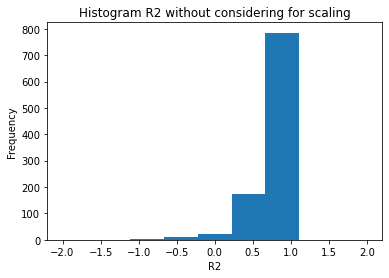

In [39]:
plt.hist(R,bins)
plt.title('Histogram R2 without considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [153]:
#############
std_gene_level = data_sub.std(axis=0)
std_gene_level=pd.DataFrame(std_gene_level,columns=['Standard Deviation'])
std_gene_level

,Standard Deviation
Zm00001d027230,8.251002
Zm00001d027231,72.487511
Zm00001d027232,4.423135
Zm00001d027233,4.877728
Zm00001d027234,2.583863
...,...
Zm00001d000458,2.648469
Zm00001d000460,0.621765
ENSRNA049478900,0.131807
ENSRNA049478881,6.806106


In [154]:
average_gene_level = data_sub.mean(axis=0)
average_gene_level=pd.DataFrame(average_gene_level,columns=['Average'])
average_gene_level

,Average
Zm00001d027230,12.596906
Zm00001d027231,67.749883
Zm00001d027232,1.388376
Zm00001d027233,1.508367
Zm00001d027234,0.751912
...,...
Zm00001d000458,1.777610
Zm00001d000460,0.355444
ENSRNA049478900,0.036079
ENSRNA049478881,4.634066


In [155]:
std_mean=[]
for i in range(0,len(average_gene_level)):
    std_mean.append(float(std_gene_level.iloc[i])/float(average_gene_level.iloc[i]))

In [156]:
std_mean=pd.DataFrame(std_mean,columns=['Std/Mean']).set_index(std_gene_level.index)
std_mean.head()

,Std/Mean
Zm00001d027230,0.655002
Zm00001d027231,1.069928
Zm00001d027232,3.185832
Zm00001d027233,3.233781
Zm00001d027234,3.436388


In [157]:
std_mean.shape

(43998, 1)

In [158]:
top=std_mean.nlargest(1000,['Std/Mean'])
top

,Std/Mean
Zm00001d006734,21.908902
Zm00001d016717,21.908902
ENSRNA049473315,21.908902
Zm00001d023176,21.908902
Zm00001d026863,21.908902
...,...
Zm00001d048642,12.723989
Zm00001d026482,12.722670
Zm00001d012904,12.721622
ZemaCp035,12.719437


In [159]:
bottom=std_mean.nsmallest(42998,['Std/Mean'])
bottom=bottom.nlargest(1000,['Std/Mean'])
bottom

,Std/Mean
ENSRNA049457438,12.717002
Zm00001d030331,12.704687
Zm00001d028592,12.691146
Zm00001d009863,12.690642
Zm00001d018094,12.687450
...,...
ENSRNA049467782,8.903884
Zm00001d039724,8.902466
Zm00001d001030,8.901408
Zm00001d044941,8.900414


In [160]:
X=data_sub[top.index]
Y=data_sub[bottom.index]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)

In [162]:
X_train.head()

,Zm00001d006734,Zm00001d016717,ENSRNA049473315,Zm00001d023176,Zm00001d026863,Zm00001d000489,Zm00001d014407,ZeamMt016,ZemaCt140,Zm00001d001153,...,ENSRNA049459041,Zm00001d005419,Zm00001d001455,Zm00001d028843,Zm00001d040086,Zm00001d048642,Zm00001d026482,Zm00001d012904,ZemaCp035,Zm00001d022671
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
X_test.head()

,Zm00001d006734,Zm00001d016717,ENSRNA049473315,Zm00001d023176,Zm00001d026863,Zm00001d000489,Zm00001d014407,ZeamMt016,ZemaCt140,Zm00001d001153,...,ENSRNA049459041,Zm00001d005419,Zm00001d001455,Zm00001d028843,Zm00001d040086,Zm00001d048642,Zm00001d026482,Zm00001d012904,ZemaCp035,Zm00001d022671
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
y_test.head()

,ENSRNA049457438,Zm00001d030331,Zm00001d028592,Zm00001d009863,Zm00001d018094,Zm00001d045562,Zm00001d050681,Zm00001d046869,Zm00001d001376,Zm00001d001283,...,ENSRNA049468991,Zm00001d015674,Zm00001d019341,Zm00001d032629,Zm00001d001208,ENSRNA049467782,Zm00001d039724,Zm00001d001030,Zm00001d044941,Zm00001d037301
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791696,0.0,0.048939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791686,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791437,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791783,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791833,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
y_train.head()

,ENSRNA049457438,Zm00001d030331,Zm00001d028592,Zm00001d009863,Zm00001d018094,Zm00001d045562,Zm00001d050681,Zm00001d046869,Zm00001d001376,Zm00001d001283,...,ENSRNA049468991,Zm00001d015674,Zm00001d019341,Zm00001d032629,Zm00001d001208,ENSRNA049467782,Zm00001d039724,Zm00001d001030,Zm00001d044941,Zm00001d037301
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791746,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791621,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791745,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791565,0.0,0.0,0.0,0.0,0.678984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
R=[]

In [54]:
for i in range(0,len(y_train.columns)):
    reg = LinearRegression().fit(X_train, y_train.iloc[:,i])
    R.append(reg.score(X_test, y_test.iloc[:,i]))

In [55]:
pd.DataFrame(R,columns=['Value']).describe()

,Value
count,1.000000e+03
mean,-1.899477e+16
std,5.242704e+17
min,-1.654153e+19
25%,-2.412367e+02
50%,-1.593346e+00
75%,-1.433713e-01
max,9.241934e-01


In [56]:
import matplotlib.pyplot as plt

In [57]:
bins=np.linspace(-5,2,10)

Text(0, 0.5, 'Frequency')

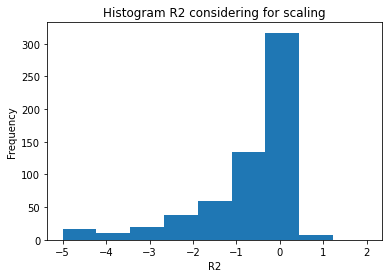

In [58]:
plt.hist(R,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [59]:
from sklearn import linear_model

In [60]:
#Let's do Lasso Regression
R_lasso=[]
R_lasso_t=[]

In [61]:
for i in range(0,len(y_train.columns)):
    lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train.iloc[:,i])
    R_lasso.append(lasso.score(X_test, y_test.iloc[:,i]))
    R_lasso_t.append(lasso.score(X_train, y_train.iloc[:,i]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27693.036457548013, tolerance: 27.824429011407013
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15624692316298994, tolerance: 0.016550315312951615
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.202820794846048, tolerance: 4.727642650651866
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergen

Text(0, 0.5, 'Frequency')

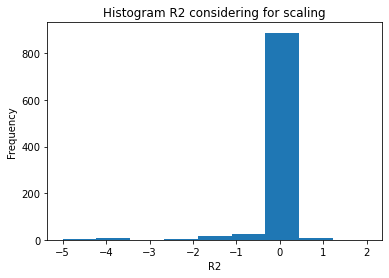

In [62]:
plt.hist(R_lasso,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [63]:
pd.DataFrame(R_lasso,columns=['Value']).describe()

,Value
count,1000.000000
mean,-27.065884
std,412.428042
min,-11824.188958
25%,-0.016675
50%,-0.005070
75%,-0.000476
max,0.996612


Text(0, 0.5, 'Frequency')

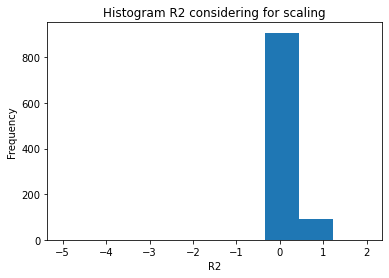

In [64]:
plt.hist(R_lasso_t,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [65]:
pd.DataFrame(R_lasso_t,columns=['Value']).describe()

,Value
count,1000.000000
mean,0.086967
std,0.232962
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000131
max,0.998022


In [66]:
#Let's do Lars Regression
R_lars=[]
R_lars_t=[]

In [67]:
X_train

,Zm00001d006734,Zm00001d016717,ENSRNA049473315,Zm00001d023176,Zm00001d026863,Zm00001d000489,Zm00001d014407,ZeamMt016,ZemaCt140,Zm00001d001153,...,ENSRNA049459041,Zm00001d005419,Zm00001d001455,Zm00001d028843,Zm00001d040086,Zm00001d048642,Zm00001d026482,Zm00001d012904,ZemaCp035,Zm00001d022671
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR3791658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
y_train

,ENSRNA049457438,Zm00001d030331,Zm00001d028592,Zm00001d009863,Zm00001d018094,Zm00001d045562,Zm00001d050681,Zm00001d046869,Zm00001d001376,Zm00001d001283,...,ENSRNA049468991,Zm00001d015674,Zm00001d019341,Zm00001d032629,Zm00001d001208,ENSRNA049467782,Zm00001d039724,Zm00001d001030,Zm00001d044941,Zm00001d037301
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791746,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791621,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791745,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791565,0.0,0.0,0.0,0.0,0.678984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR3791658,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791475,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791799,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
for i in range(0,len(y_train.columns)):
    lars = linear_model.Lars(n_nonzero_coefs=10).fit(X_train, y_train.iloc[:,i])
    R_lars.append(lars.score(X_test, y_test.iloc[:,i]))
    R_lars_t.append(lars.score(X_train, y_train.iloc[:,i]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.267e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.267e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.064e-

Text(0, 0.5, 'Frequency')

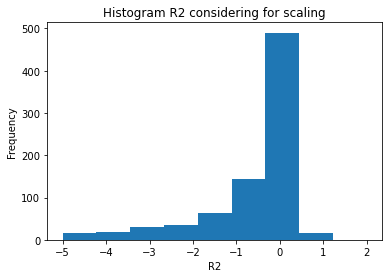

In [70]:
plt.hist(R_lars,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [71]:
pd.DataFrame(R_lars,columns=['Value']).describe()

,Value
count,1.000000e+03
mean,-4.319492e+24
std,9.346305e+25
min,-2.599719e+27
25%,-2.748150e+00
50%,-3.164153e-01
75%,-1.810329e-02
max,9.608901e-01


Text(0, 0.5, 'Frequency')

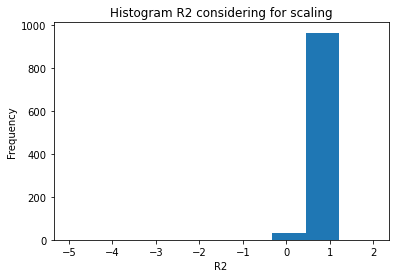

In [72]:
plt.hist(R_lars_t,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [73]:
pd.DataFrame(R_lars_t,columns=['Value']).describe()

,Value
count,1000.000000
mean,0.907635
std,0.188014
min,-1.789148
25%,0.915395
50%,0.977976
75%,0.997875
max,1.000000


In [92]:
X_train.to_csv('X_train.csv')

In [93]:
y_train.to_csv('y_train.csv')

In [94]:
X_test.to_csv('X_test.csv')

In [95]:
y_test.to_csv('y_test.csv')

In [ ]:
X_train, X_test, y_train, y_test

In [74]:
ranking=pd.read_csv("ranking_idx.txt", delimiter='\t')

In [75]:
ranking_2=pd.read_csv("ranking.txt", delimiter='\t')

In [76]:
ranking_2.head()

,Zm00001d035411,Zm00001d035367,0.049798
0,ENSRNA049478136,Zm00001d035367,0.046629
1,Zm00001d035367,ENSRNA049478136,0.046360
2,Zm00001d035367,Zm00001d035411,0.045304
3,Zm00001d007740,Zm00001d007732,0.044762
4,Zm00001d007732,Zm00001d007733,0.044467


In [77]:
ranking_2

,Zm00001d035411,Zm00001d035367,0.049798
0,ENSRNA049478136,Zm00001d035367,0.046629
1,Zm00001d035367,ENSRNA049478136,0.046360
2,Zm00001d035367,Zm00001d035411,0.045304
3,Zm00001d007740,Zm00001d007732,0.044762
4,Zm00001d007732,Zm00001d007733,0.044467
...,...,...,...
17535150,Zm00001d051473,Zm00001d019162,0.000000
17535151,Zm00001d004089,Zm00001d048817,0.000000
17535152,Zm00001d035680,Zm00001d006399,0.000000
17535153,Zm00001d005793,Zm00001d008059,0.000000


In [78]:
ranking_2.iloc[:,:]

,Zm00001d035411,Zm00001d035367,0.049798
0,ENSRNA049478136,Zm00001d035367,0.046629
1,Zm00001d035367,ENSRNA049478136,0.046360
2,Zm00001d035367,Zm00001d035411,0.045304
3,Zm00001d007740,Zm00001d007732,0.044762
4,Zm00001d007732,Zm00001d007733,0.044467
...,...,...,...
17535150,Zm00001d051473,Zm00001d019162,0.000000
17535151,Zm00001d004089,Zm00001d048817,0.000000
17535152,Zm00001d035680,Zm00001d006399,0.000000
17535153,Zm00001d005793,Zm00001d008059,0.000000


In [79]:
ranking_2.shape

(17535155, 3)

In [80]:
Z=pd.DataFrame(np.zeros((17535156, 3)),columns=['Variable1','Variable2','Correlation'])
Z

,Variable1,Variable2,Correlation
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
17535151,0.0,0.0,0.0
17535152,0.0,0.0,0.0
17535153,0.0,0.0,0.0
17535154,0.0,0.0,0.0


In [81]:
Z.iloc[0,:]=ranking_2.columns

In [82]:
Z.iloc[1:,:]=ranking_2.iloc[:,:].values

In [83]:
Z.head()

,Variable1,Variable2,Correlation
0,Zm00001d035411,Zm00001d035367,0.049798
1,ENSRNA049478136,Zm00001d035367,0.046629
2,Zm00001d035367,ENSRNA049478136,0.04636
3,Zm00001d035367,Zm00001d035411,0.045304
4,Zm00001d007740,Zm00001d007732,0.044762


In [84]:
Z["Correlation"] = pd.to_numeric(Z["Correlation"], downcast="float")

In [85]:
Z=Z.sort_values(by=['Correlation'],ascending=False)
Z

,Variable1,Variable2,Correlation
0,Zm00001d035411,Zm00001d035367,0.049798
1,ENSRNA049478136,Zm00001d035367,0.046629
2,Zm00001d035367,ENSRNA049478136,0.046360
3,Zm00001d035367,Zm00001d035411,0.045304
4,Zm00001d007740,Zm00001d007732,0.044762
...,...,...,...
17399146,Zm00001d005394,Zm00001d037831,0.000000
17399147,Zm00001d041935,Zm00001d031738,0.000000
17399148,Zm00001d038880,Zm00001d049467,0.000000
17399149,Zm00001d020843,Zm00001d026405,0.000000


In [86]:
Z_sub=Z[Z['Correlation']>0.01]
Z_sub

,Variable1,Variable2,Correlation
0,Zm00001d035411,Zm00001d035367,0.049798
1,ENSRNA049478136,Zm00001d035367,0.046629
2,Zm00001d035367,ENSRNA049478136,0.046360
3,Zm00001d035367,Zm00001d035411,0.045304
4,Zm00001d007740,Zm00001d007732,0.044762
...,...,...,...
36285,Zm00001d027593,Zm00001d022126,0.010001
36282,Zm00001d009506,Zm00001d040126,0.010001
36284,Zm00001d017454,Zm00001d040803,0.010001
36283,Zm00001d027841,Zm00001d008397,0.010001


In [87]:
Z_sub['Variable1'].unique()

array(['Zm00001d035411', 'ENSRNA049478136', 'Zm00001d035367', ...,
       'Zm00001d051600', 'Zm00001d040061', 'Zm00001d033473'], dtype=object)

In [88]:
try_=Z_sub[Z_sub['Variable1']=='ENSRNA049478136']
try_

,Variable1,Variable2,Correlation
1,ENSRNA049478136,Zm00001d035367,0.046629
12,ENSRNA049478136,Zm00001d035411,0.039022
500,ENSRNA049478136,Zm00001d035400,0.020043
802,ENSRNA049478136,ENSRNA049478205,0.018929
7043,ENSRNA049478136,ENSRNA049479627,0.014131
9370,ENSRNA049478136,Zm00001d004162,0.013468
10567,ENSRNA049478136,ENSRNA049479581,0.013194
12746,ENSRNA049478136,ENSRNA049478494,0.012740
19485,ENSRNA049478136,ENSRNA049479585,0.011658
23069,ENSRNA049478136,ENSRNA049478534,0.011228


In [89]:
try_['Variable2']

1         Zm00001d035367
12        Zm00001d035411
500       Zm00001d035400
802      ENSRNA049478205
7043     ENSRNA049479627
9370      Zm00001d004162
10567    ENSRNA049479581
12746    ENSRNA049478494
19485    ENSRNA049479585
23069    ENSRNA049478534
24598     Zm00001d032090
33639    ENSRNA049478662
Name: Variable2, dtype: object

In [90]:
data_sub

,Zm00001d027230,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027234,Zm00001d027235,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,...,ENSRNA049478534,ENSRNA049478548,ENSRNA049478530,ENSRNA049478543,ENSRNA049478539,Zm00001d000458,Zm00001d000460,ENSRNA049478900,ENSRNA049478881,ENSRNA049478891
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791403,8.510949,10.058043,0.000000,0.000000,0.146622,0.0,0.292435,18.542450,16.514658,21.261669,...,16.537172,0.000000,11.872853,0.000000,8.448431,1.709411,0.242246,0.000000,9.235837,0.000000
ERR3791404,10.910000,8.692256,0.000000,0.000000,0.000000,0.0,0.611194,24.256623,18.382964,22.765770,...,10.743384,0.000000,8.903063,0.000000,6.732991,2.551930,0.281277,0.250853,3.929845,0.000000
ERR3791405,6.985268,34.136787,0.103331,0.117841,0.000000,0.0,1.083260,26.484477,0.265134,21.201103,...,37.059623,0.505987,97.406708,0.000000,8.060919,0.271377,0.074779,0.000000,2.879880,0.000000
ERR3791406,5.884681,30.208199,0.000000,0.025468,0.000000,0.0,1.521768,17.038040,0.254364,14.792027,...,29.745078,0.000000,27.391827,0.353128,18.185037,0.254155,0.126060,0.000000,12.775794,0.000000
ERR3791407,7.128136,35.295292,0.000000,0.031765,0.000000,0.0,0.759191,28.343867,0.328578,31.576936,...,9.570144,0.000000,50.979666,0.000000,1.578511,1.743424,0.000000,0.000000,0.569079,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR3791878,6.007504,16.762100,0.263908,0.046303,0.000000,0.0,27.943259,8.082687,0.000000,11.078452,...,10.309875,0.000000,13.030966,0.000000,8.356181,1.443960,0.171887,0.000000,1.548474,0.000000
ERR3791879,10.071299,13.032553,0.000000,0.085680,0.171123,0.0,5.290145,42.891737,0.295429,44.338081,...,22.522938,0.000000,70.717294,0.000000,4.780672,2.992572,0.824612,0.000000,1.091556,0.791990
ERR3791880,8.730089,15.204311,0.000000,0.029820,0.000000,0.0,2.850902,40.248099,0.850945,45.952563,...,21.548276,0.000000,24.197028,0.000000,8.189448,2.827062,0.590404,0.000000,2.315079,0.413472


In [91]:
X=data_sub[try_['Variable2']]
X

,Zm00001d035367,Zm00001d035411,Zm00001d035400,ENSRNA049478205,ENSRNA049479627,Zm00001d004162,ENSRNA049479581,ENSRNA049478494,ENSRNA049479585,ENSRNA049478534,Zm00001d032090,ENSRNA049478662
Run,,,,,,,,,,,,
ERR3791403,94.053784,17.510909,23.400941,5.538021,1.960396,0.145815,6.467943,20.320145,24.257451,16.537172,0.049207,15.519714
ERR3791404,115.164671,22.527257,28.302071,4.822737,4.734618,0.203170,5.333099,66.929398,21.206424,10.743384,0.251397,15.332505
ERR3791405,56.776508,11.277710,11.844961,3.234958,7.552326,4.105047,6.429519,27.285902,17.796787,37.059623,2.041510,19.466254
ERR3791406,41.245379,8.283911,5.395347,15.850272,31.828626,3.186909,21.345005,223.251395,68.691497,29.745078,2.441148,39.513705
ERR3791407,61.366305,12.010770,47.921795,2.764860,51.233198,20.820234,0.850200,6.275077,3.515586,9.570144,0.063874,9.067321
...,...,...,...,...,...,...,...,...,...,...,...,...
ERR3791878,0.000000,0.000000,0.000000,12.997732,15.703012,51.731957,30.673330,57.712043,39.214550,10.309875,94.318307,10.728711
ERR3791879,0.105599,0.000000,0.056545,11.559552,25.015160,0.680719,20.352864,76.693103,43.909210,22.522938,160.669232,8.664225
ERR3791880,2.315444,1.212437,0.856086,24.139451,62.590491,0.888452,28.883570,55.964668,38.457047,21.548276,181.851881,16.419250


In [92]:
Y=data_sub['ENSRNA049478136']
Y

Run
ERR3791403       9.698120
ERR3791404       5.555729
ERR3791405       5.128983
ERR3791406      15.383295
ERR3791407       1.365035
                 ...     
ERR3791878     726.634833
ERR3791879     713.824520
ERR3791880    1258.529726
ERR3791881       7.002513
ERR3791882       1.910197
Name: ENSRNA049478136, Length: 480, dtype: float64

In [93]:
from sklearn import linear_model

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)

In [259]:
reg = LinearRegression().fit(X_train, y_train)

In [260]:
R.append(reg.score(X_test, y_test))

In [262]:
Z_sub['Variable1'].unique().shape

(3034,)

In [94]:
R=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    reg = LinearRegression().fit(X_train, y_train)
    R.append(reg.score(X_test, y_test))

In [95]:
pd.DataFrame(R,columns=['Value']).describe()

,Value
count,3034.000000
mean,0.489593
std,7.239237
min,-392.220718
25%,0.520148
50%,0.793475
75%,0.918985
max,0.999091


Text(0, 0.5, 'Frequency')

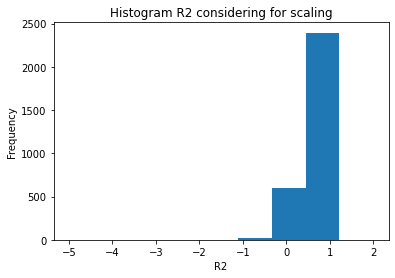

In [96]:
plt.hist(R,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [119]:
R_8=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    lars = linear_model.Lars(n_nonzero_coefs=5).fit(X_train, y_train)
    R_8.append(lars.score(X_test, y_test))

In [120]:
pd.DataFrame(R_8,columns=['Value']).describe()

,Value
count,3034.000000
mean,0.488900
std,7.174990
min,-392.220718
25%,0.513869
50%,0.739797
75%,0.865887
max,0.999091


Text(0, 0.5, 'Frequency')

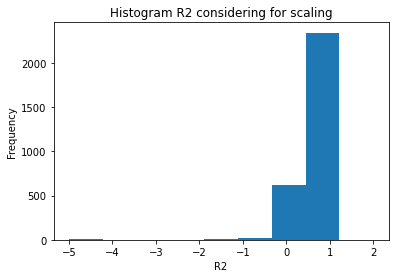

In [118]:
plt.hist(R_8,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [97]:
R_1=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
    R_1.append(lasso.score(X_test, y_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111581.7645344657, tolerance: 4634.52951855
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35346.03759969775, tolerance: 86.74094594432322
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5198.285124211805, tolerance: 734.0055397454086
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: O

In [98]:
pd.DataFrame(R_1,columns=['Value']).describe()

,Value
count,3034.000000
mean,0.506064
std,7.184249
min,-392.194249
25%,0.524682
50%,0.797474
75%,0.919164
max,0.999094


Text(0, 0.5, 'Frequency')

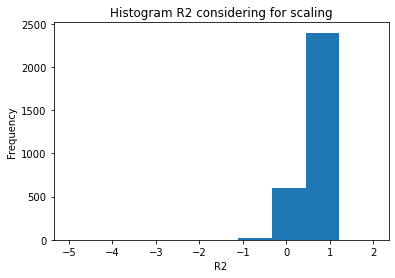

In [99]:
plt.hist(R_1,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [ ]:
R=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
    svr.fit(X_train, y_train)
    R.append(svr.score(X_test, y_test))

In [ ]:
pd.DataFrame(R,columns=['Value']).describe()

In [ ]:
plt.hist(R,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [104]:
R_3=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    forest = RandomForestRegressor(max_depth=3, random_state=0)
    forest.fit(X_train, y_train)
    R_3.append(forest.score(X_test, y_test))

In [105]:
pd.DataFrame(R_3,columns=['Value']).describe()

,Value
count,3034.000000
mean,0.648344
std,2.750196
min,-143.088614
25%,0.609832
50%,0.823650
75%,0.919456
max,0.994677


Text(0, 0.5, 'Frequency')

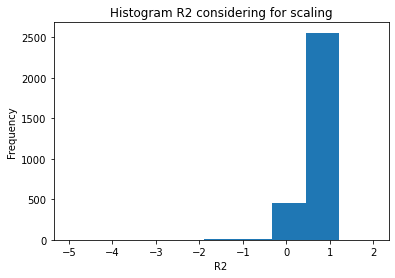

In [106]:
plt.hist(R_3,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [107]:
R_4=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    ada = AdaBoostRegressor(random_state=0, n_estimators=100)
    ada.fit(X_train, y_train)
    R_4.append(ada.score(X_test, y_test))

In [108]:
pd.DataFrame(R_4,columns=['Value']).describe()

,Value
count,3034.000000
mean,0.575522
std,2.313832
min,-90.669182
25%,0.535663
50%,0.793318
75%,0.906943
max,0.993938


Text(0, 0.5, 'Frequency')

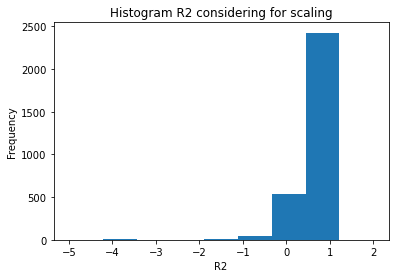

In [109]:
plt.hist(R_4,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [110]:
R_5=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    gradientboosting = GradientBoostingRegressor(random_state=0)
    gradientboosting.fit(X_train, y_train)
    R_5.append(gradientboosting.score(X_test, y_test))

In [111]:
pd.DataFrame(R_5,columns=['Value']).describe()

,Value
count,3034.000000
mean,0.628533
std,1.826325
min,-83.917614
25%,0.571165
50%,0.827218
75%,0.927595
max,0.997653


Text(0, 0.5, 'Frequency')

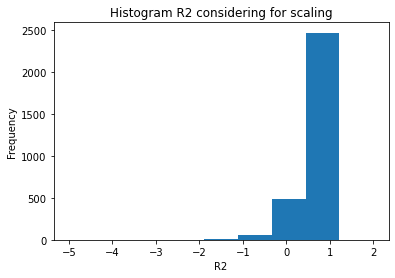

In [112]:
plt.hist(R_5,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [113]:
R_6=[]
for i in Z_sub['Variable1'].unique(): 
    w=Z_sub[Z_sub['Variable1']==i]
    X=data_sub[w['Variable2']]
    Y=data_sub[i]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
    bagging = BaggingRegressor(base_estimator=forest, n_estimators=10, random_state=0).fit(X_train, y_train)
    R_6.append(bagging.score(X_test, y_test))

In [114]:
pd.DataFrame(R_6,columns=['Value']).describe()

,Value
count,3034.000000
mean,0.628243
std,4.280552
min,-230.977472
25%,0.622861
50%,0.826769
75%,0.921688
max,0.995210


Text(0, 0.5, 'Frequency')

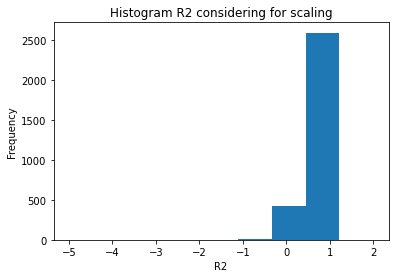

In [115]:
plt.hist(R_6,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [121]:
X_train.head()

,Zm00001d012922
Run,
ERR3791442,61.257898
ERR3791746,3.930313
ERR3791621,73.512654
ERR3791745,2.494458
ERR3791565,7.046486


In [75]:
X_test.head()

,Zm00001d006734,Zm00001d016717,ENSRNA049473315,Zm00001d023176,Zm00001d026863,Zm00001d000489,Zm00001d014407,ZeamMt016,ZemaCt140,Zm00001d001153,...,ENSRNA049459041,Zm00001d005419,Zm00001d001455,Zm00001d028843,Zm00001d040086,Zm00001d048642,Zm00001d026482,Zm00001d012904,ZemaCp035,Zm00001d022671
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
y_train.head()

,ENSRNA049457438,Zm00001d030331,Zm00001d028592,Zm00001d009863,Zm00001d018094,Zm00001d045562,Zm00001d050681,Zm00001d046869,Zm00001d001376,Zm00001d001283,...,ENSRNA049468991,Zm00001d015674,Zm00001d019341,Zm00001d032629,Zm00001d001208,ENSRNA049467782,Zm00001d039724,Zm00001d001030,Zm00001d044941,Zm00001d037301
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791746,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791621,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791745,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791565,0.0,0.0,0.0,0.0,0.678984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
y_train

,ENSRNA049457438,Zm00001d030331,Zm00001d028592,Zm00001d009863,Zm00001d018094,Zm00001d045562,Zm00001d050681,Zm00001d046869,Zm00001d001376,Zm00001d001283,...,ENSRNA049468991,Zm00001d015674,Zm00001d019341,Zm00001d032629,Zm00001d001208,ENSRNA049467782,Zm00001d039724,Zm00001d001030,Zm00001d044941,Zm00001d037301
Run,,,,,,,,,,,,,,,,,,,,,
ERR3791442,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791746,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791621,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791745,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791565,0.0,0.0,0.0,0.0,0.678984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR3791658,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791475,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3791799,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
ytry_train=y_train.iloc[:,0:2]

In [96]:
ytry_test=y_test.iloc[:,0:2]

In [97]:
ytry_train

,ENSRNA049457438,Zm00001d030331
Run,,
ERR3791442,0.0,0.0
ERR3791746,0.0,0.0
ERR3791621,0.0,0.0
ERR3791745,0.0,0.0
ERR3791565,0.0,0.0
...,...,...
ERR3791658,0.0,0.0
ERR3791475,0.0,0.0
ERR3791799,0.0,0.0


In [98]:
ytry_test

,ENSRNA049457438,Zm00001d030331
Run,,
ERR3791696,0.0,0.048939
ERR3791686,0.0,0.000000
ERR3791437,0.0,0.000000
ERR3791783,0.0,0.000000
ERR3791833,0.0,0.000000
...,...,...
ERR3791525,0.0,0.000000
ERR3791426,0.0,0.000000
ERR3791416,0.0,0.000000


In [ ]:
#####Have your train and test set prepared########

In [101]:
#############Trying different models##################
####Random Forest, Logistic, Ridge, Lasso, Linear, SVR, Ensemble Models - Bagging & Bootstrapping####### 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import datasets, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


In [131]:
def Models(x_train, x_test,y_train,y_test):
    #Linear Model
    R_linear=[]
    R_logistic=[]
    R_ridge=[]
    R_lasso=[]
    R_svr=[]
    R_RandomForest=[]
    R_Bagging=[]
    R_ada=[]
    R_gradientboosting=[]
    for i in range(0,len(y_train.columns)):
        #Linear Regression
        reg = LinearRegression().fit(x_train, y_train.iloc[:,i])
        R_linear.append(reg.score(x_test, y_test.iloc[:,i]))
        #Lasso Regression
        lasso=Lasso(alpha=0.1)
        lasso.fit(x_train, y_train.iloc[:,i])
        R_lasso.append(lasso.score(x_test, y_test.iloc[:,i]))
        #Ridge Regression
        ridge=Ridge(alpha=0.1)
        ridge.fit(x_train, y_train.iloc[:,i])
        R_ridge.append(ridge.score(x_test, y_test.iloc[:,i]))
        #SVR
        svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
        svr.fit(x_train, y_train.iloc[:,i])
        R_svr.append(svr.score(x_test, y_test.iloc[:,i]))
        #Random Forest
        forest = RandomForestRegressor(max_depth=3, random_state=0)
        forest.fit(x_train, y_train.iloc[:,i])
        R_RandomForest.append(forest.score(x_test, y_test.iloc[:,i]))
        #Bagging 
        bagging = BaggingRegressor(base_estimator=forest, n_estimators=10, random_state=0).fit(x_train, y_train.iloc[:,i])
        R_Bagging.append(bagging.score(x_test, y_test.iloc[:,i]))
        #AdaBoosting 
        ada = AdaBoostRegressor(random_state=0, n_estimators=100)
        ada.fit(x_train, y_train.iloc[:,i])
        R_ada.append(ada.score(x_test, y_test.iloc[:,i]))
        #GradientBoosting 
        gradientboosting = GradientBoostingRegressor(random_state=0)
        gradientboosting.fit(x_train, y_train.iloc[:,i])
        R_gradientboosting.append(gradientboosting.score(x_test, y_test.iloc[:,i]))
    return pd.DataFrame()

In [132]:
Models(X_train, X_test,y_train,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27693.036457548013, tolerance: 27.824429011407013
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15624692316298994, tolerance: 0.016550315312951615
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.202820794846048, tolerance: 4.727642650651866
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergen

Text(0, 0.5, 'Frequency')

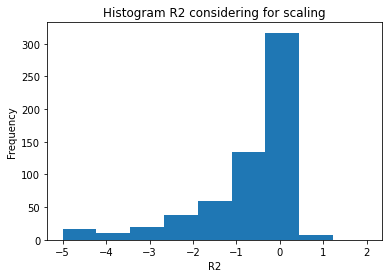

In [134]:
plt.hist(R_linear,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

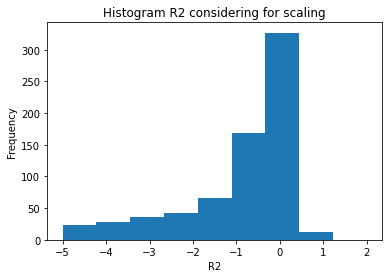

In [137]:
plt.hist(R_ridge,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

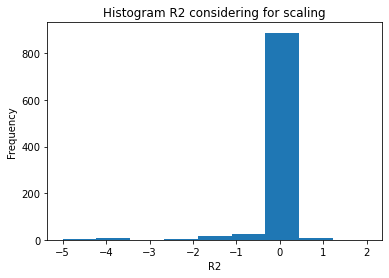

In [138]:
plt.hist(R_lasso,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

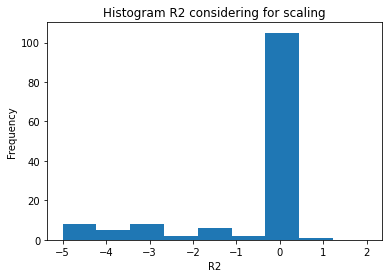

In [139]:
plt.hist(R_svr,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

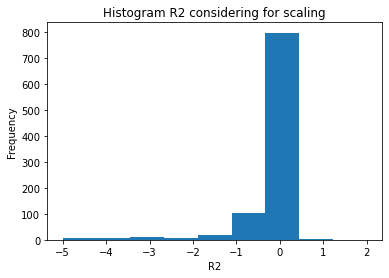

In [140]:
plt.hist(R_RandomForest,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

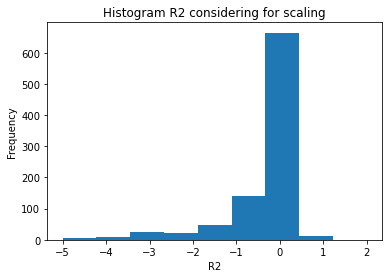

In [144]:
plt.hist(R_gradientboosting,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

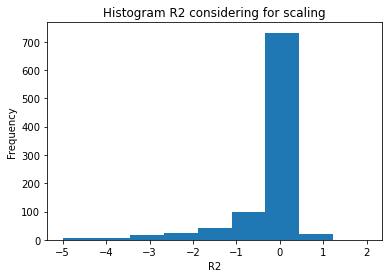

In [145]:
plt.hist(R_ada,bins)
plt.title('Histogram R2 considering for scaling')
plt.xlabel('R2')
plt.ylabel('Frequency')

In [ ]:
bagging = BaggingRegressor(base_estimator=forest, n_estimators=10, random_state=0).fit(x_train, y_train.iloc[:,i])
        R_Bagging.append(bagging.score(x_test, y_test.iloc[:,i]))

In [ ]:
R_linear=[]
    R_logistic=[]
    R_ridge=[]
    R_lasso=[]
    R_svr=[]
    R_RandomForest=[]
    R_Bagging=[]
    R_ada=[]
    R_gradientboosting=[]

In [110]:
R_linear=[]
for i in range(0,len(y_train.columns)):
    reg = LinearRegression().fit(X_train, y_train.iloc[:,i])
    R_linear.append(reg.score(X_test, y_test.iloc[:,i]))

In [111]:
pd.DataFrame(R_linear,columns=['Value']).describe()

,Value
count,1.000000e+03
mean,-1.899477e+16
std,5.242704e+17
min,-1.654153e+19
25%,-2.412367e+02
50%,-1.593346e+00
75%,-1.433713e-01
max,9.241934e-01


In [169]:
R_bagging=[]
for i in range(0,len(y_train.columns)):    
    bagging = BaggingRegressor(base_estimator=forest, n_estimators=10, random_state=0).fit(X_train, y_train.iloc[:,i])
    R_bagging.append(bagging.score(X_test, y_test.iloc[:,i]))

In [170]:
pd.DataFrame(R_bagging,columns=['Value']).describe()

,Value
count,1000.000000
mean,-0.988572
std,8.073406
min,-187.299390
25%,-0.092677
50%,-0.025974
75%,-0.010415
max,1.000000


In [171]:
R_lars=[]
for i in range(0,len(y_train.columns)):    
    lars = linear_model.Lars(n_nonzero_coefs=5).fit(X_train, y_train.iloc[:,i])
    R_lars.append(lars.score(X_test, y_test.iloc[:,i]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.267e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.267e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=6.064e-

In [172]:
pd.DataFrame(R_lars,columns=['Value']).describe()

,Value
count,1000.000000
mean,-7.880336
std,84.926898
min,-2553.912111
25%,-1.338358
50%,-0.140259
75%,-0.012217
max,0.998064


In [117]:
R_lasso=[]
for i in range(0,len(y_train.columns)):    
    lasso=Lasso(alpha=0.1)
    lasso.fit(X_train, y_train.iloc[:,i])
    R_lasso.append(lasso.score(X_test, y_test.iloc[:,i]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27693.036457548013, tolerance: 27.824429011407013
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15624692316298994, tolerance: 0.016550315312951615
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.202820794846048, tolerance: 4.727642650651866
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergen

In [118]:
pd.DataFrame(R_lasso,columns=['Value']).describe()

,Value
count,1000.000000
mean,-27.065884
std,412.428042
min,-11824.188958
25%,-0.016675
50%,-0.005070
75%,-0.000476
max,0.996612


In [121]:
R_ridge=[]
for i in range(0,len(y_train.columns)): 
    ridge=Ridge(alpha=0.1)
    ridge.fit(X_train, y_train.iloc[:,i])
    R_ridge.append(ridge.score(X_test, y_test.iloc[:,i]))

In [122]:
pd.DataFrame(R_ridge,columns=['Value']).describe()

,Value
count,1000.000000
mean,-164.141228
std,1954.119688
min,-51878.467738
25%,-8.430610
50%,-1.057917
75%,-0.138868
max,0.979443


In [123]:
R_svr=[]
for i in range(0,len(y_train.columns)):
    svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
    svr.fit(X_train, y_train.iloc[:,i])
    R_svr.append(svr.score(X_test, y_test.iloc[:,i]))

In [124]:
pd.DataFrame(R_svr,columns=['Value']).describe()

,Value
count,1.000000e+03
mean,-8.679299e+07
std,1.226288e+09
min,-2.822874e+10
25%,-1.937922e+06
50%,-7.184785e+04
75%,-4.109057e+01
max,6.336477e-01


In [125]:
R_RandomForest=[]
for i in range(0,len(y_train.columns)):
    forest = RandomForestRegressor(max_depth=3, random_state=0)
    forest.fit(X_train, y_train.iloc[:,i])
    R_RandomForest.append(forest.score(X_test, y_test.iloc[:,i]))

In [126]:
pd.DataFrame(R_RandomForest,columns=['Value']).describe()

,Value
count,1000.000000
mean,-1.609219
std,9.976385
min,-202.975627
25%,-0.192595
50%,-0.038466
75%,-0.013152
max,1.000000


In [127]:
#AdaBoosting 
R_ada=[]
for i in range(0,len(y_train.columns)):
    ada = AdaBoostRegressor(random_state=0, n_estimators=100)
    ada.fit(X_train, y_train.iloc[:,i])
    R_ada.append(ada.score(X_test, y_test.iloc[:,i]))

In [128]:
pd.DataFrame(R_ada,columns=['Value']).describe()

,Value
count,1000.000000
mean,-2.308529
std,18.411717
min,-409.795979
25%,-0.329690
50%,-0.017111
75%,-0.006993
max,1.000000


In [129]:
R_gradientboosting=[]
for i in range(0,len(y_train.columns)):
    gradientboosting = GradientBoostingRegressor(random_state=0)
    gradientboosting.fit(X_train, y_train.iloc[:,i])
    R_gradientboosting.append(gradientboosting.score(X_test, y_test.iloc[:,i]))

In [130]:
pd.DataFrame(R_gradientboosting,columns=['Value']).describe()

,Value
count,1000.000000
mean,-4.084437
std,22.840491
min,-403.871726
25%,-0.620595
50%,-0.094269
75%,-0.017795
max,0.943683
